In [3]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')


from src_experiment import get_new_moons_data_for_all_noises

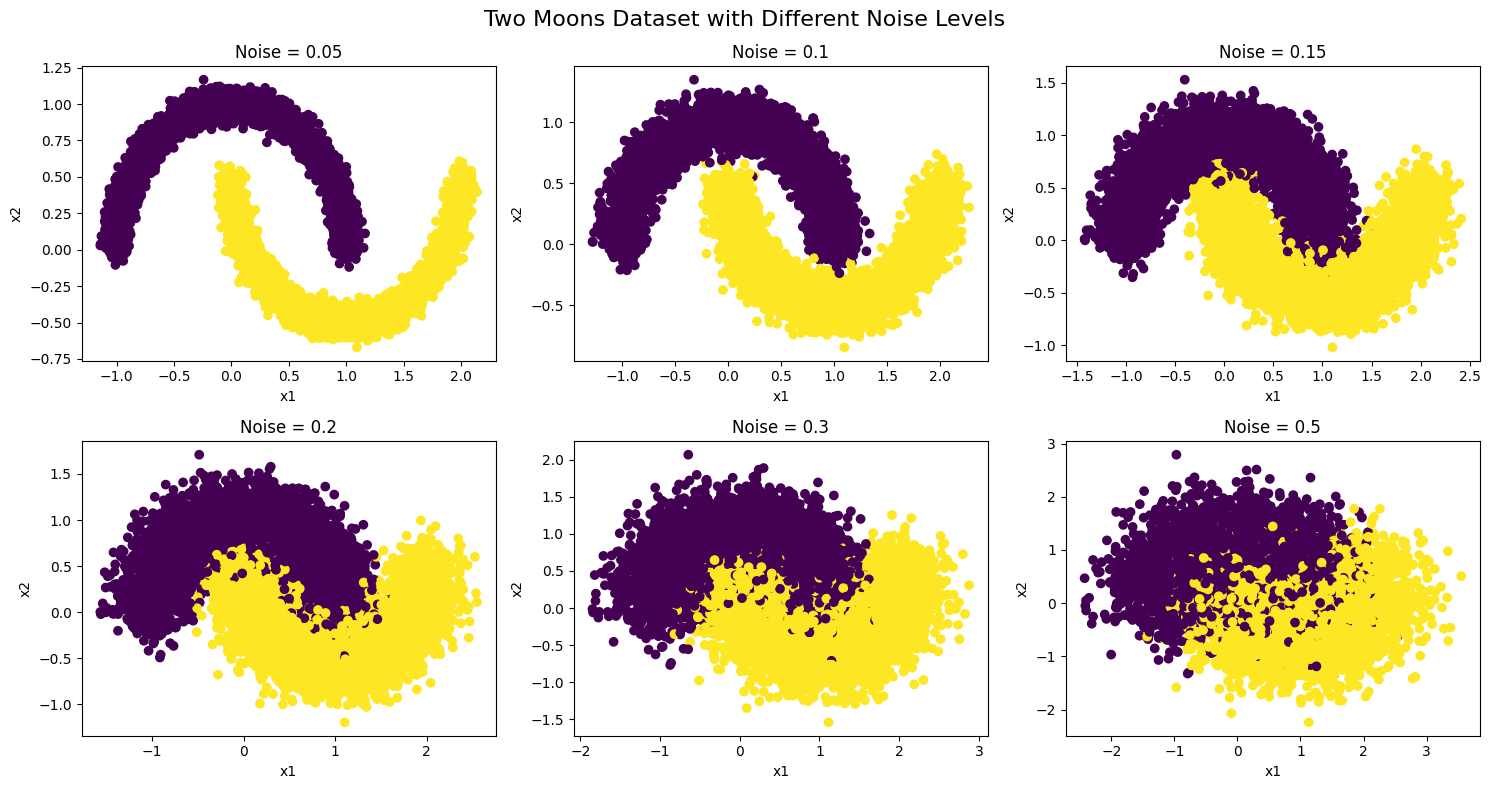

In [4]:
import torch
import matplotlib.pyplot as plt

def plot_dataloader_on_ax(dataloader, ax, title=None):
    """
    Plot 2D data from a PyTorch DataLoader onto a given matplotlib axis.
    """
    X_all = []
    y_all = []

    for X, y in dataloader:
        X_all.append(X.detach().cpu())
        y_all.append(y.detach().cpu())

    X_all = torch.cat(X_all, dim=0)
    y_all = torch.cat(y_all, dim=0)

    ax.scatter(
        X_all[:, 0],
        X_all[:, 1],
        c=y_all,
    )

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    if title is not None:
        ax.set_title(title)

# Create figure with 6 subplots (2 rows x 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

data = get_new_moons_data_for_all_noises()
for i, (noise, data) in enumerate(data.items()):
    plot_dataloader_on_ax(
        data,
        axes[i],
        title=f"Noise = {noise}"
    )

fig.suptitle("Two Moons Dataset with Different Noise Levels", fontsize=16)
plt.tight_layout()
plt.show()
